In [66]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from sympy import *

# 1 EMG HP Filter

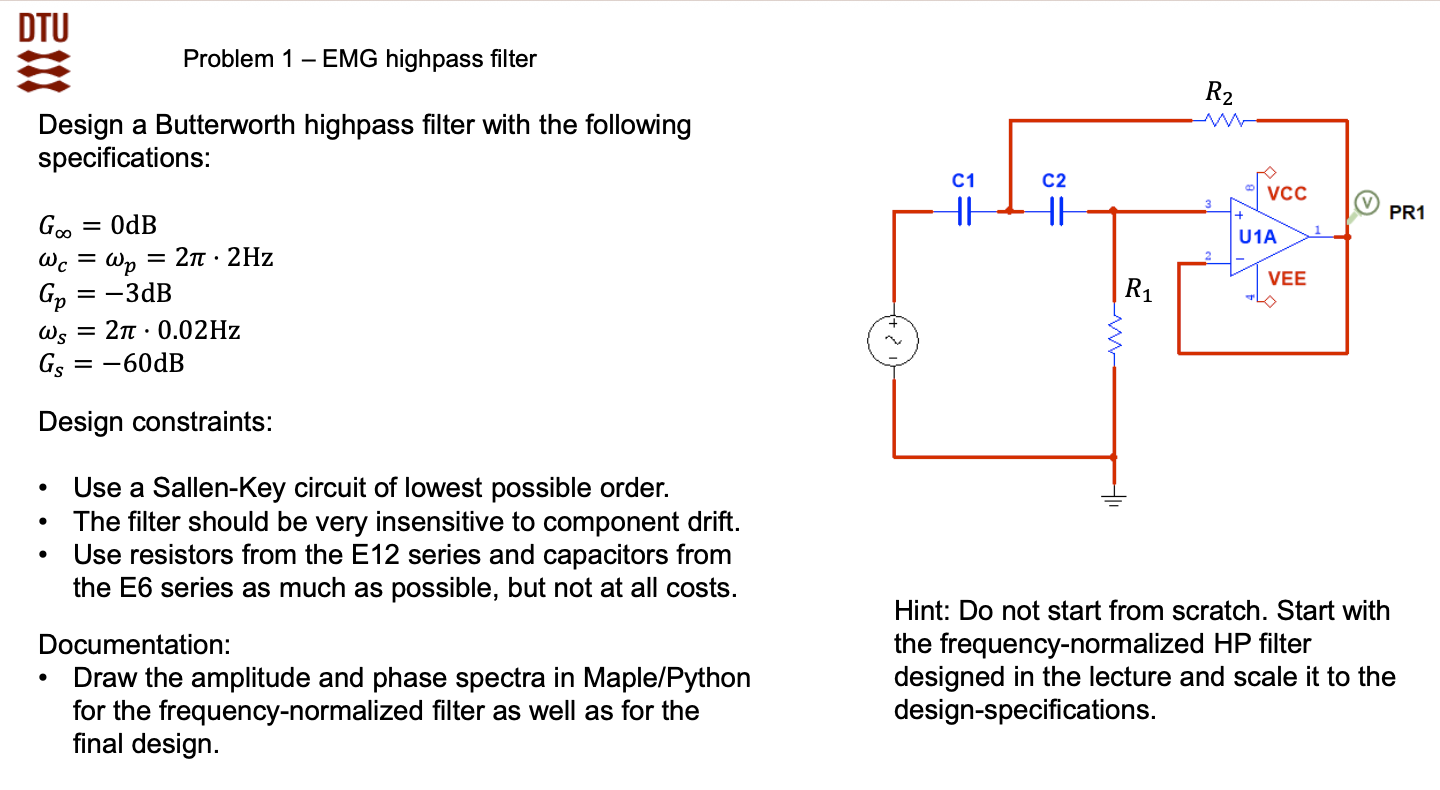

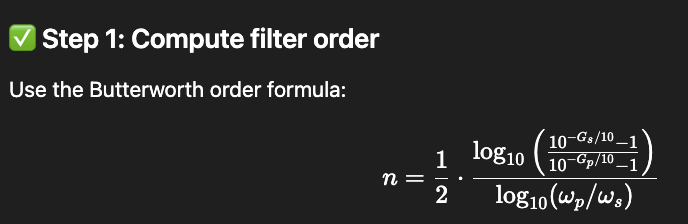

In [67]:
G_p = -3   # Passband gain in dB (attenuation at cutoff)
G_s = -60  # Stopband gain in dB (attenuation in stopband)

omega_p = 2 * math.pi * 2     # Passband edge frequency in rad/s (2 Hz)
omega_s = 2 * math.pi * 0.02  # Stopband edge frequency in rad/s (0.02 Hz)

# numerator and denominator of the Butterworth order formula
numerator = math.log10((10**(-G_s / 10) - 1) / (10**(-G_p / 10) - 1)) # log of gain ratio
denominator = math.log10(omega_p / omega_s)                           # log of frequency ratio

# Final Butterworth filter order (rounded up to nearest integer)
n = math.ceil(0.5 * numerator / denominator)
n

2

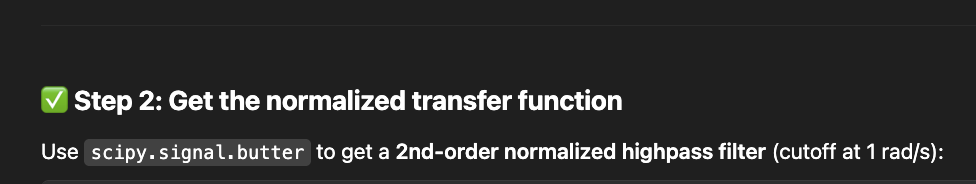

In [68]:
# Generate analog (Laplace domain) highpass Butterworth filter with normalized cutoff (Wn=1 rad/s)
b_norm, a_norm = signal.butter(N=n, Wn=1, btype='high', analog=True) # n is the order of the filter from before
print("Numerator (b):", b_norm)
print("Denominator (a):", a_norm)

Numerator (b): [1. 0. 0.]
Denominator (a): [1.         1.41421356 1.        ]


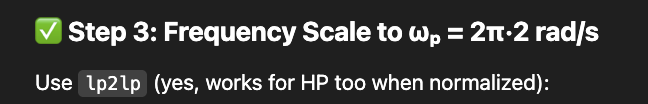

In [69]:
# Target cutoff frequency (2 Hz converted to rad/s)
omega_c = 2 * math.pi * 2  

# Scale the normalized highpass filter to the desired cutoff frequency
b_scaled, a_scaled = signal.lp2lp(b_norm, a_norm, wo=omega_c)
display(b_scaled, a_scaled)

array([1., 0., 0.])

array([  1.        ,  17.77153175, 157.91367042])

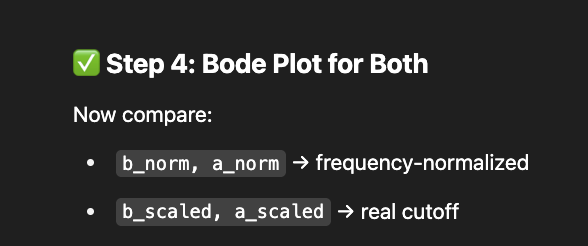

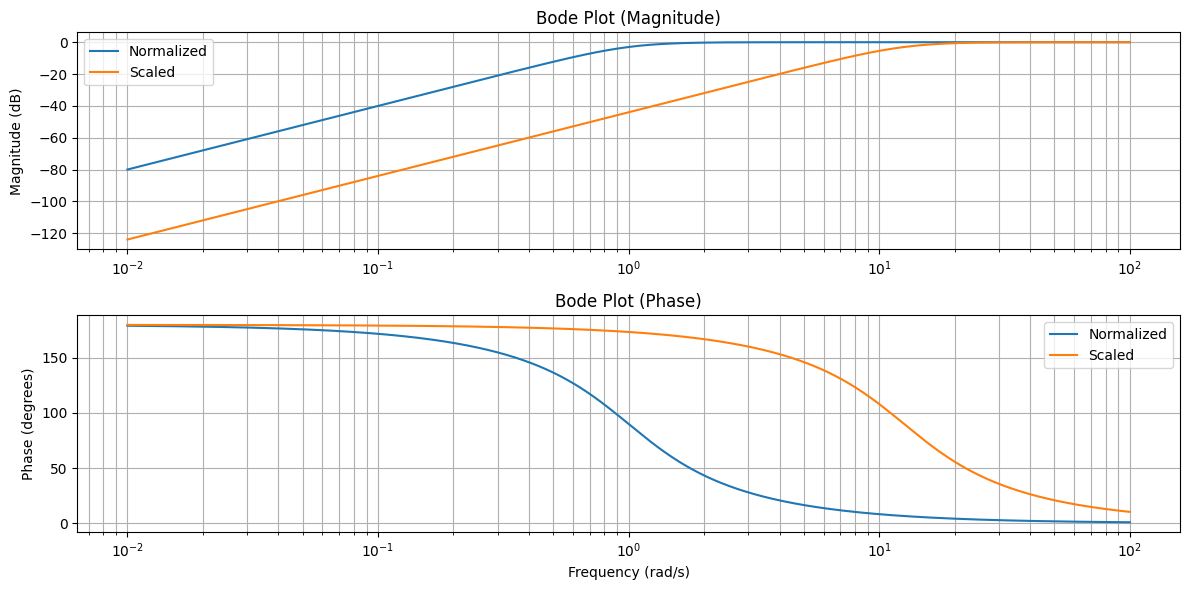

In [70]:
w = np.logspace(-2, 2, 1000)  # Frequency range from 10^-2 to 10^2 rad/s (log scale)

# Define the normalized transfer function and compute its Bode response
sys_norm = signal.TransferFunction(b_norm, a_norm)
w1, mag1, phase1 = signal.bode(sys_norm, w)

# Define the scaled (real cutoff) transfer function and compute its Bode response
sys_scaled = signal.TransferFunction(b_scaled, a_scaled)
w2, mag2, phase2 = signal.bode(sys_scaled, w)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.semilogx(w1, mag1, label="Normalized")
plt.semilogx(w2, mag2, label="Scaled")
plt.ylabel("Magnitude (dB)")
plt.title("Bode Plot (Magnitude)")
plt.grid(True, which='both')
plt.legend()

plt.subplot(2, 1, 2)
plt.semilogx(w1, phase1, label="Normalized")
plt.semilogx(w2, phase2, label="Scaled")
plt.ylabel("Phase (degrees)")
plt.xlabel("Frequency (rad/s)")
plt.title("Bode Plot (Phase)")
plt.grid(True, which='both')
plt.legend()

plt.tight_layout()
plt.show()

# 2

In [71]:
# TODO : continue...